In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!ls "/content/gdrive/My Drive/Hotel Booking Demand - Supervised Learning"

hotel_booking.ipynb  hotel_bookings.csv


In [0]:
csv_file = "/content/gdrive/My Drive/Hotel Booking Demand - Supervised Learning/hotel_bookings.csv"

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#read the csv file.
df = pd.read_csv(csv_file)

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.shape

(119390, 32)

In [8]:
#length of data
length_df = len(df)
length_df

119390

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [13]:
#how many null data
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [0]:
#4 children data is null filling with 0
df['children'] = df['children'].fillna(0)

In [15]:
#percentage of country missing values
country_isnull_percent = (df['country'].isnull().sum()/length_df) * 100
country_isnull_percent

0.40874445095904177

In [16]:
#percentage of agent missing values
agent_isnull_percent = (df['agent'].isnull().sum()/length_df) * 100
agent_isnull_percent

13.686238378423655

In [17]:
#percentage of company missing values
company_isnull_percent = (df['company'].isnull().sum()/length_df) * 100
company_isnull_percent

94.30689337465449

In [0]:
#since 94% of company value is missing dropping the country column, there wouldnt be any way to default the value.
df = df.drop('company',axis=1)

In [0]:
#taking a backup copy
backup = df.copy()

Visualization of the dataset

In [20]:
df.groupby('is_canceled')['hotel'].count()

is_canceled
0    75166
1    44224
Name: hotel, dtype: int64

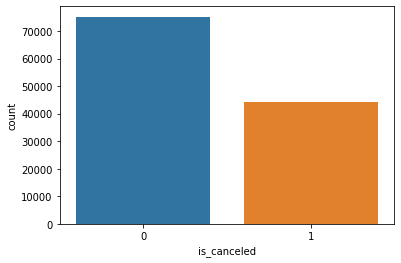

In [21]:
#checking the count of the is canceled
sns.countplot(x='is_canceled',data=df)

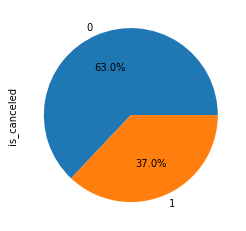

In [22]:
df['is_canceled'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Looks like only 37% have canceled.

In [23]:
#how many bookings were from city vs resort
df.groupby(['is_canceled','hotel'])['lead_time'].count()

is_canceled  hotel       
0            City Hotel      46228
             Resort Hotel    28938
1            City Hotel      33102
             Resort Hotel    11122
Name: lead_time, dtype: int64

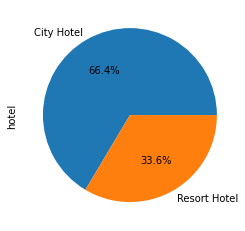

In [24]:
#different hotel types
df['hotel'].value_counts().plot(kind='pie',autopct='%1.1f%%')

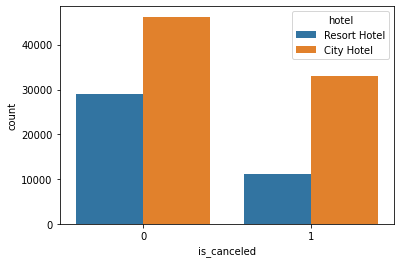

In [25]:
sns.countplot(x='is_canceled',hue='hotel',data=df)

Looks like city hotel have more cancelations

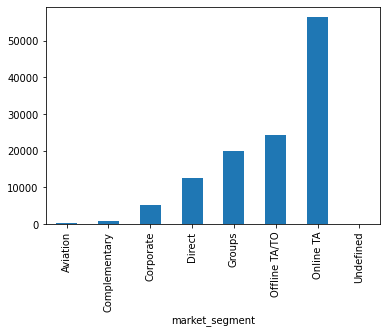

In [26]:
#market segments
df.groupby(['market_segment'])['is_canceled'].count().plot(kind='bar')

Looks like aviation industry doesnt cancel much

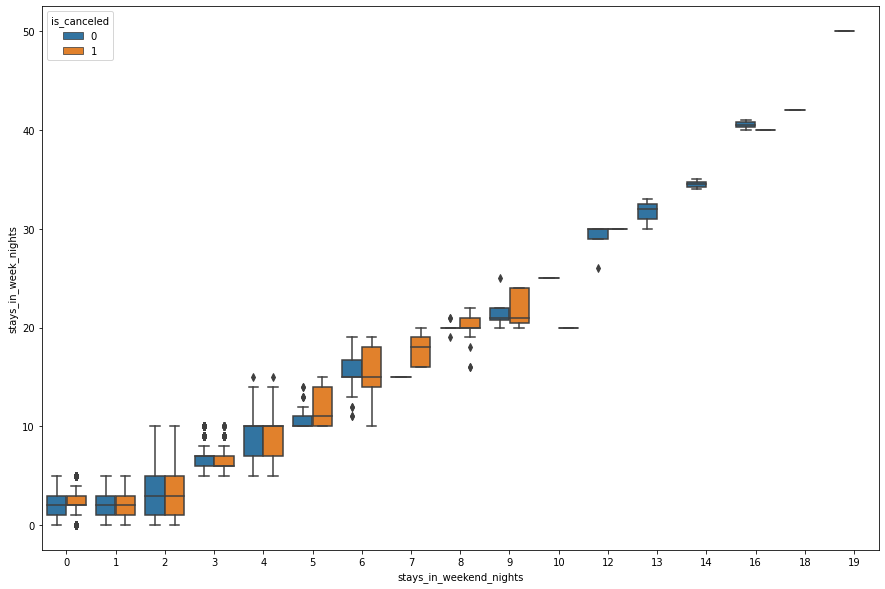

In [27]:
#stay weekend nights (stays_in_weekend_nights) vs weeknights (stays_in_week_nights)
plt.figure(figsize=(15,10))
sns.boxplot(x='stays_in_weekend_nights',y='stays_in_week_nights',hue='is_canceled',data=df)

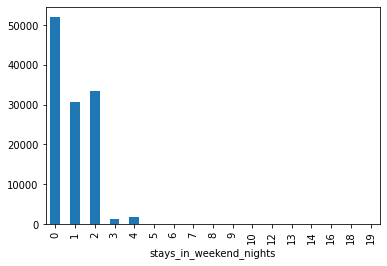

In [28]:
df.groupby('stays_in_weekend_nights')['is_canceled'].count().plot(kind='bar')

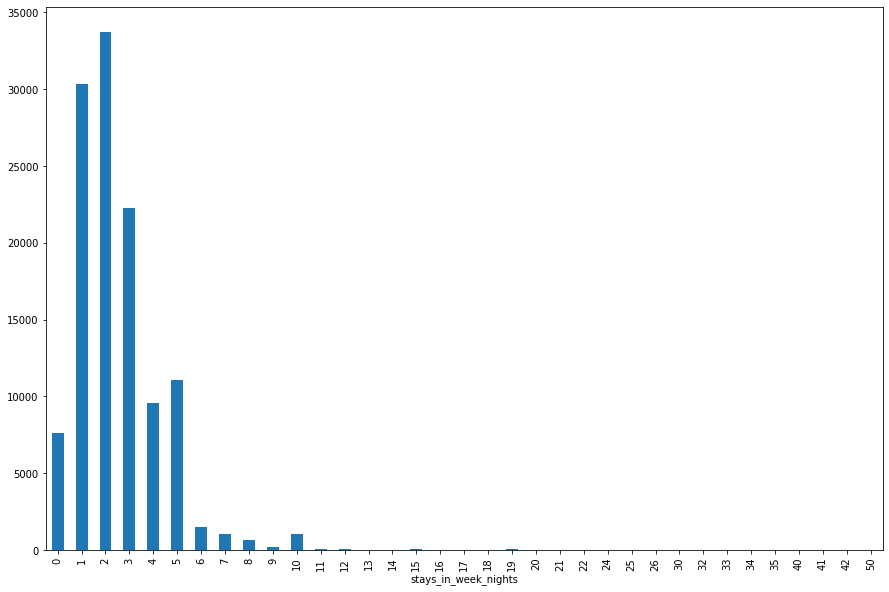

In [29]:
plt.figure(figsize=(15,10))
df.groupby('stays_in_week_nights')['is_canceled'].count().plot(kind='bar')

In [0]:
#total days of stay, adding the total days into the data
df['total_days'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [31]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


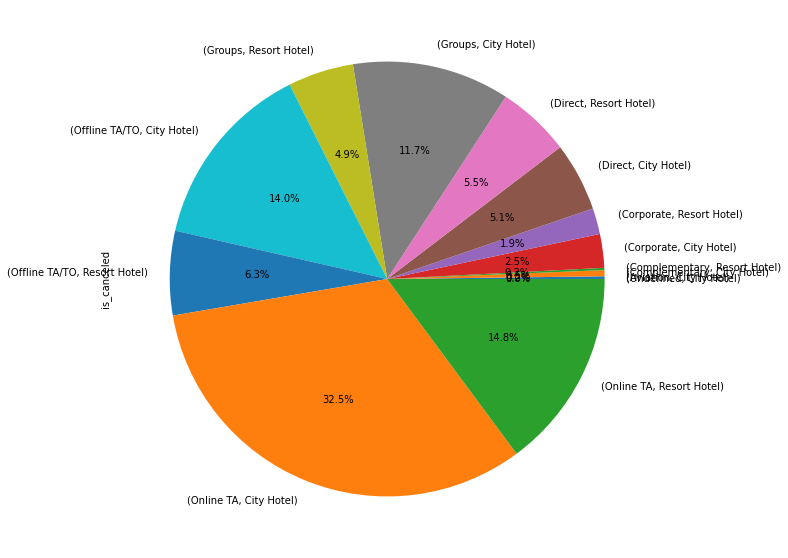

In [32]:
#how does the market segment, hotel,cancelation look
plt.figure(figsize=(20,10))
df.groupby(['market_segment','hotel'])['is_canceled'].count().plot(kind='pie',autopct='%1.1f%%')

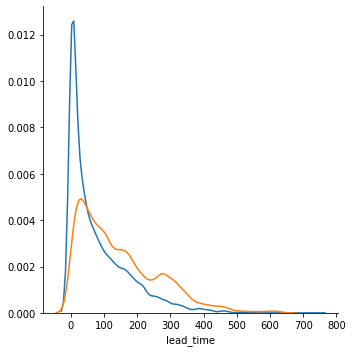

In [33]:
#what does the lead time convey about the hotel cancelation
g = sns.FacetGrid(df, hue="is_canceled", height=5) #,xlim=(0,500))
g = g.map(sns.kdeplot, "lead_time")

In [34]:
#arrival month and cancelation and whether resort or city
df.groupby(['hotel','arrival_date_day_of_month'])['is_canceled'].count()

hotel         arrival_date_day_of_month
City Hotel    1                            2332
              2                            2667
              3                            2530
              4                            2461
              5                            2857
                                           ... 
Resort Hotel  27                           1265
              28                           1276
              29                           1214
              30                           1473
              31                            856
Name: is_canceled, Length: 62, dtype: int64

In [35]:
df.groupby(['is_repeated_guest','hotel'])['is_canceled'].count()

is_repeated_guest  hotel       
0                  City Hotel      77298
                   Resort Hotel    38282
1                  City Hotel       2032
                   Resort Hotel     1778
Name: is_canceled, dtype: int64

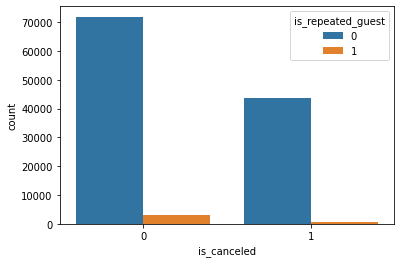

In [36]:
#how many repeated guests canceled
sns.countplot(x='is_canceled',hue='is_repeated_guest',data=df)

In [37]:
#guests with previous cancellations 
df.groupby(['previous_cancellations','is_canceled','hotel'])['lead_time'].count()

previous_cancellations  is_canceled  hotel       
0                       0            City Hotel      45857
                                     Resort Hotel    28767
                        1            City Hotel      28084
                                     Resort Hotel    10198
1                       0            City Hotel        191
                                     Resort Hotel      146
                        1            City Hotel       4964
                                     Resort Hotel      750
2                       0            City Hotel         59
                                     Resort Hotel       19
                        1            City Hotel         13
                                     Resort Hotel       25
3                       0            City Hotel         44
                                     Resort Hotel        1
                        1            City Hotel          7
                                     Resort Hotel       13
4     

In [38]:
#Adults, children, babies
df.groupby(['adults','children','babies'])['is_canceled'].count()

adults  children  babies
0       0.0       0           180
        1.0       0             4
        2.0       0           205
                  1             3
        3.0       0            11
1       0.0       0         22577
                  1             9
                  9             1
        1.0       0           277
                  1             2
        2.0       0           155
                  1             2
        3.0       0             4
2       0.0       0         81560
                  1           708
                  2            12
                  10            1
        1.0       0          3950
                  1           136
                  2             3
        2.0       0          3221
                  1            27
        3.0       0            61
        10.0      0             1
3       0.0       0          5666
                  1            10
        1.0       0           485
                  1             2
        2.0       0    

In [39]:
df.groupby(['deposit_type','is_canceled'])['lead_time'].count()

deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    0                 93
              1              14494
Refundable    0                126
              1                 36
Name: lead_time, dtype: int64

Feature Engineering

In [0]:
df['children'] = pd.to_numeric(df['children'])

In [0]:
#create a is_family column and check cancelation based on whether they are family.
def is_family(x):
  if(x['adults'] >0) & (x['children']>0):
    value = 1
  elif(x['adults'] >0) & (x['babies'] >0):
    value =1
  else:
    value=0
  return value

df['is_family'] = df.apply(is_family,axis=1)

In [42]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,0


In [43]:
df.groupby(['is_family','is_canceled'])['lead_time'].count()

is_family  is_canceled
0          0              69232
           1              41049
1          0               5934
           1               3175
Name: lead_time, dtype: int64

In [0]:
#if deposit given
def deposit(x):
  if(x['deposit_type'] == 'No Deposit') | (x['deposit_type'] == 'Refundable'):
    return 1
  else:
    return 0
df['deposit_received'] = df['deposit_type'].apply(lambda x: 0 if x =='No Deposit' or x =='Refundable' else 1)

In [45]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days,is_family,deposit_received
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,0,0


In [46]:
df.groupby(['deposit_received','is_canceled'])['lead_time'].count()

deposit_received  is_canceled
0                 0              75073
                  1              29730
1                 0                 93
                  1              14494
Name: lead_time, dtype: int64

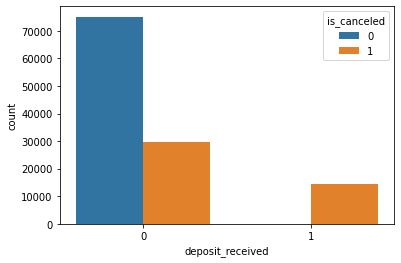

In [47]:
sns.countplot(x='deposit_received',hue='is_canceled',data=df)

In [0]:
#since we have deposit received dropping column deposit type
df = df.drop('deposit_type',axis=1)

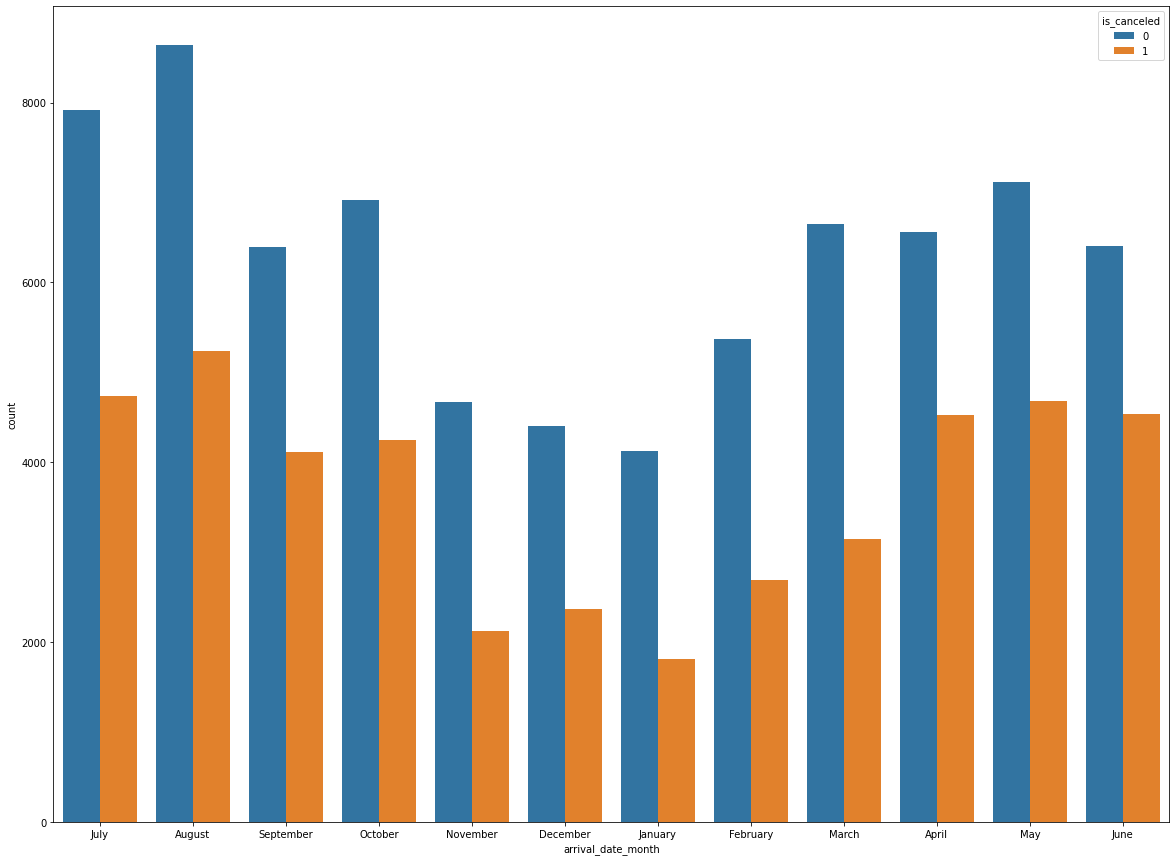

In [49]:
#checking out the month the bookings happened
plt.figure(figsize=(20,15))
sns.countplot(x='arrival_date_month',hue='is_canceled',data=df)

In [0]:
#trying to take the total customers
df['total_customers'] = df['adults'] + df['children']+df['babies']

In [51]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_days,is_family,deposit_received,total_customers
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0,0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0,0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,0,0,2.0


In [0]:
#trying to drop columns that are not necessary
df = df.drop(['adults','children','babies'],axis=1)

In [0]:
df = df.drop(['reservation_status_date'],axis=1)

In [0]:
df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [55]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_days,is_family,deposit_received,total_customers
0,Resort Hotel,0,342,2015,7,27,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,NaN,0,Transient,0.0,0,0,Check-Out,0,0,0,2.0
1,Resort Hotel,0,737,2015,7,27,1,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,NaN,0,Transient,0.0,0,0,Check-Out,0,0,0,2.0
2,Resort Hotel,0,7,2015,7,27,1,0,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,NaN,0,Transient,75.0,0,0,Check-Out,1,0,0,1.0
3,Resort Hotel,0,13,2015,7,27,1,0,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304.0,0,Transient,75.0,0,0,Check-Out,1,0,0,1.0
4,Resort Hotel,0,14,2015,7,27,1,0,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,0,Transient,98.0,0,1,Check-Out,2,0,0,2.0


In [0]:
df = df.drop('agent',axis=1)

In [0]:
df = df.drop('country',axis=1)

Finding the corelation between the attributes.

In [0]:
#label encoder to bring the values of certain columns between 0 and 1 to help find correlation.
#will be using the backup copy to find the correlations.
encode = LabelEncoder()

In [0]:
backup['meal'] = encode.fit_transform(backup['meal'])

In [0]:
#backup['country'] = encode.fit_transform(backup['country'])

In [0]:
backup['market_segment'] = encode.fit_transform(backup['market_segment'])
backup['distribution_channel'] = encode.fit_transform(backup['distribution_channel'])
backup['reserved_room_type'] = encode.fit_transform(backup['reserved_room_type'])
backup['assigned_room_type'] = encode.fit_transform(backup['assigned_room_type'])
backup['customer_type'] = encode.fit_transform(backup['customer_type'])
backup['reservation_status'] = encode.fit_transform(backup['reservation_status'])

In [62]:
backup.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.017678,0.059338,0.167600,-0.084793,0.110133,-0.057358,-0.061282,-0.176028,-0.144381,-0.083114,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,0.000349,0.013797,0.220414,-0.124410,0.086042,-0.073548,-0.106089,-0.172219,0.000149,-0.069741,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.065840,0.107697,0.022644,0.010341,-0.119822,0.029218,0.092809,0.036141,0.030872,0.063457,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.017381,-0.000510,0.005699,-0.030131,0.035501,-0.020904,-0.007997,-0.005684,0.005508,-0.031201,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.007086,-0.004088,0.001578,-0.006145,-0.027011,-0.000300,0.016929,0.011646,0.010613,0.001487,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,0.045744,0.115350,0.093097,-0.087239,-0.012775,-0.042715,0.142083,0.086643,0.063281,0.140739,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,0.036742,0.108569,0.087185,-0.097245,-0.013992,-0.048743,0.168616,0.100795,0.096209,0.182382,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,0.026327,0.208409,0.178978,-0.146426,-0.006738,-0.107983,0.211434,0.144779,-0.051673,-0.035594,-0.008283,-0.101756,0.230641,0.014785,0.122884,-0.071802
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.049794,0.087346,0.008320,-0.032858,-0.024729,-0.021072,0.378064,0.327644,0.048952,0.041070,-0.033271,-0.053400,0.324853,0.056255,0.081736,-0.003399
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,0.002864,-0.015457,-0.027796,-0.008943,-0.007501,-0.006550,0.038794,0.041244,0.083440,0.036184,-0.010621,-0.016137,0.029186,0.037383,0.097889,0.030971


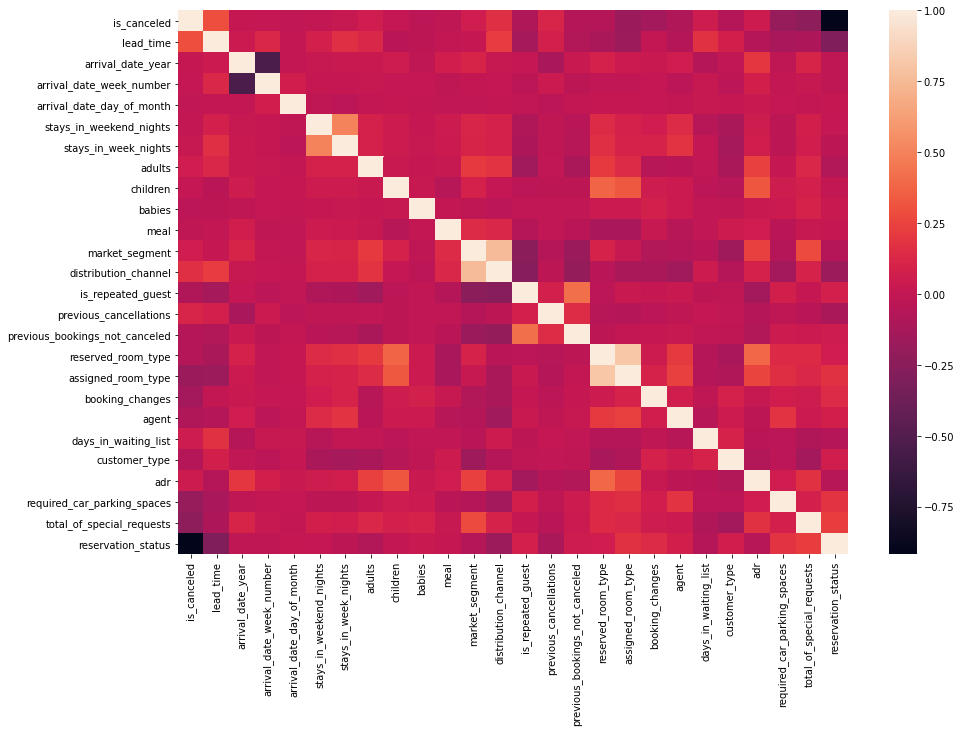

In [63]:
plt.figure(figsize=(15,10))
data = backup.corr()
sns.heatmap(data)

In [64]:
data['is_canceled'].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
booking_changes                  -0.144381
is_repeated_guest                -0.084793
agent                            -0.083114
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
babies                           -0.032491
meal                             -0.017678
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
children                          0.005036
arrival_date_week_number          0.008148
arrival_date_year                 0.016660
stays_in_week_nights              0.024765
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
adults                            0.060017
previous_cancellations            0.110133
distributio

From the correlation we understand that there is a high negative correalation between is canceled and reservation status, that is when the reseravtion goes down, is caceled goes up. Looks like agent doesnt have much correlation so dropiing the column was a good idea. Lead time is an important correlation.

Going into Modeling with the given information, using Logistic Regression, Decision Trees and XGBoost.

In [0]:
#taking a backup copy
backup_copy = df.copy()

In [66]:
df.shape

(119390, 28)

In [67]:
backup_copy.shape

(119390, 28)

In [68]:
backup_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_days,is_family,deposit_received,total_customers
0,Resort Hotel,0,342,2015,7,27,1,0,0,BB,Direct,Direct,0,0,0,C,C,3,0,Transient,0.0,0,0,Check-Out,0,0,0,2.0
1,Resort Hotel,0,737,2015,7,27,1,0,0,BB,Direct,Direct,0,0,0,C,C,4,0,Transient,0.0,0,0,Check-Out,0,0,0,2.0
2,Resort Hotel,0,7,2015,7,27,1,0,1,BB,Direct,Direct,0,0,0,A,C,0,0,Transient,75.0,0,0,Check-Out,1,0,0,1.0
3,Resort Hotel,0,13,2015,7,27,1,0,1,BB,Corporate,Corporate,0,0,0,A,A,0,0,Transient,75.0,0,0,Check-Out,1,0,0,1.0
4,Resort Hotel,0,14,2015,7,27,1,0,2,BB,Online TA,TA/TO,0,0,0,A,A,0,0,Transient,98.0,0,1,Check-Out,2,0,0,2.0


In [0]:
#getting dummies for the encoded data One hot encoding
df = pd.get_dummies(data = df, columns = ['hotel','meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status'])

In [0]:
backup_copy_1 = df.copy()

In [70]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_days,is_family,deposit_received,total_customers,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,7,27,1,0,0,0,0,0,3,0,0.0,0,0,0,0,0,2.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,737,2015,7,27,1,0,0,0,0,0,4,0,0.0,0,0,0,0,0,2.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,7,2015,7,27,1,0,1,0,0,0,0,0,75.0,0,0,1,0,0,1.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,13,2015,7,27,1,0,1,0,0,0,0,0,75.0,0,0,1,0,0,1.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,14,2015,7,27,1,0,2,0,0,0,0,0,98.0,0,1,2,0,0,2.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [0]:
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [77]:
#Logistic Regression
log_regr = LogisticRegression(solver = 'lbfgs')

# fit the model with data
log_regr.fit(X_train,y_train)

y_prob = log_regr.predict_proba(X_test)[:,1]
y_pred=log_regr.predict(X_test)

accuracy_score(y_test,y_pred)

0.969735042019153

In [78]:
confusion_matrix(y_test,y_pred)

array([[22311,   167],
       [  917, 12422]])

In [0]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

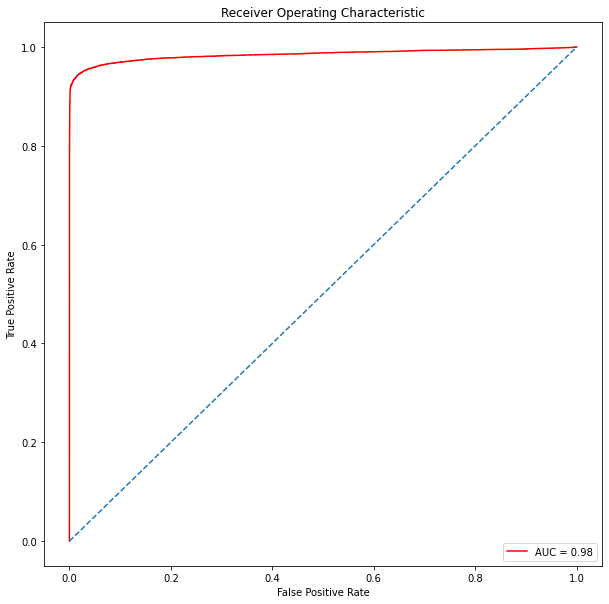

In [80]:
plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [81]:
#decision Trees
dec_trees = DecisionTreeClassifier(max_depth = 12)
dec_trees.fit(X_train,y_train)

y_prob = dec_trees.predict_proba(X_test)[:,1]
y_pred=dec_trees.predict(X_test)

accuracy_score(y_test,y_pred)

1.0

In [82]:
confusion_matrix(y_test,y_pred)

array([[22478,     0],
       [    0, 13339]])

In [0]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

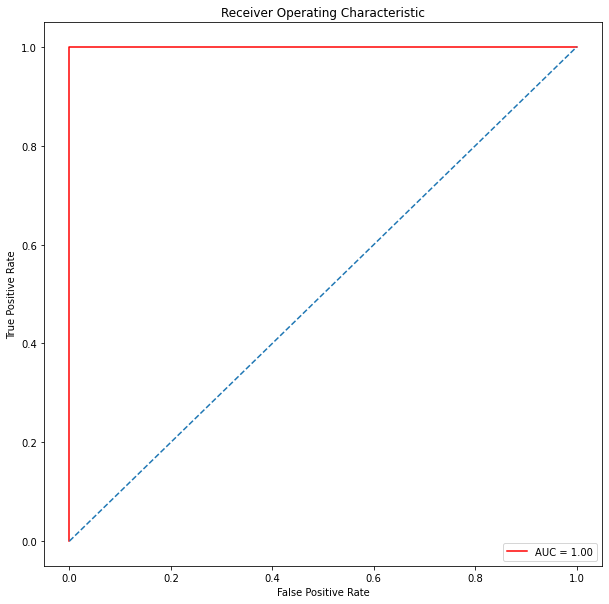

In [84]:
plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [86]:
#support vector machines
svc = SVC(kernel = 'linear')
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

accuracy_score(y_test,y_pred)

1.0

In [88]:
#looks like SVM and decision trees gives us a perfect accuracy may be because if the reseratio status due to high correlation going to try by removing the reservation status and trying.
backup_copy_1.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_days,is_family,deposit_received,total_customers,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,7,27,1,0,0,0,0,0,3,0,0.0,0,0,0,0,0,2.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,737,2015,7,27,1,0,0,0,0,0,4,0,0.0,0,0,0,0,0,2.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,7,2015,7,27,1,0,1,0,0,0,0,0,75.0,0,0,1,0,0,1.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,13,2015,7,27,1,0,1,0,0,0,0,0,75.0,0,0,1,0,0,1.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,14,2015,7,27,1,0,2,0,0,0,0,0,98.0,0,1,2,0,0,2.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [0]:
backup_copy_1 = backup_copy_1.drop(['reservation_status_Canceled','reservation_status_Check-Out','reservation_status_No-Show'],axis=1)

In [90]:
backup_copy_1.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_days,is_family,deposit_received,total_customers,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,7,27,1,0,0,0,0,0,3,0,0.0,0,0,0,0,0,2.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,737,2015,7,27,1,0,0,0,0,0,4,0,0.0,0,0,0,0,0,2.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,7,2015,7,27,1,0,1,0,0,0,0,0,75.0,0,0,1,0,0,1.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,13,2015,7,27,1,0,1,0,0,0,0,0,75.0,0,0,1,0,0,1.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,7,27,1,0,2,0,0,0,0,0,98.0,0,1,2,0,0,2.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
y = backup_copy_1["is_canceled"]
X = backup_copy_1.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [93]:
#decision Trees without reservation status
dec_trees_1 = DecisionTreeClassifier(max_depth = 12)
dec_trees_1.fit(X_train,y_train)

y_prob = dec_trees_1.predict_proba(X_test)[:,1]
y_pred=dec_trees_1.predict(X_test)

accuracy_score(y_test,y_pred)

0.8238266744841835

In [94]:
confusion_matrix(y_test,y_pred)

array([[20596,  1882],
       [ 4428,  8911]])

In [0]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

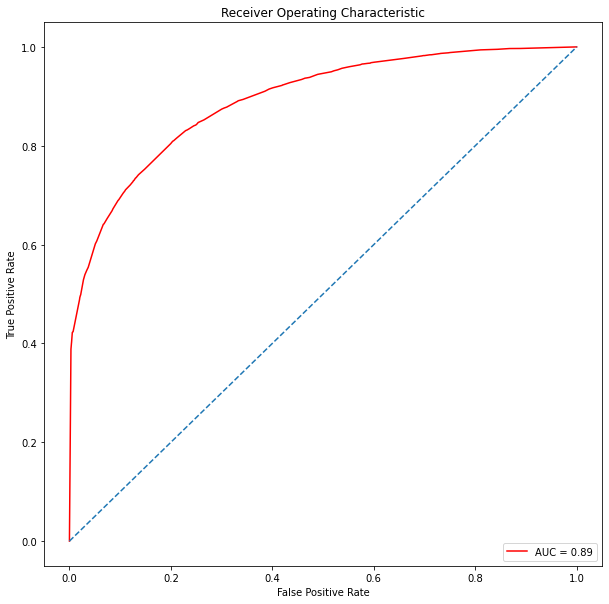

In [96]:
plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [99]:
#support vector machines without reservation status
svc_1 = SVC(kernel = 'linear')
svc_1.fit(X_train,y_train)

y_pred=svc_1.predict(X_test)

accuracy_score(y_test,y_pred)

0.8014629924337605

In [0]:
#looks like cancelation depends very much on reservation status but still we are getting a pretty good accuracy.